# Test if packages were installed correctly

## Basic packages

In [1]:
import os
import sqlite3
from math import ceil


## Pandas, Matplotlib, Seaborn, Scikit-Learn

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' 

# Setting seaborn style
sns.set()

In [4]:
from matplotlib import __version__ as mplver
print(mplver)

3.7.2


In [5]:
import warnings
warnings.filterwarnings('ignore')

import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

In [6]:
from sklearn import datasets

In [7]:
dataset = datasets.load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


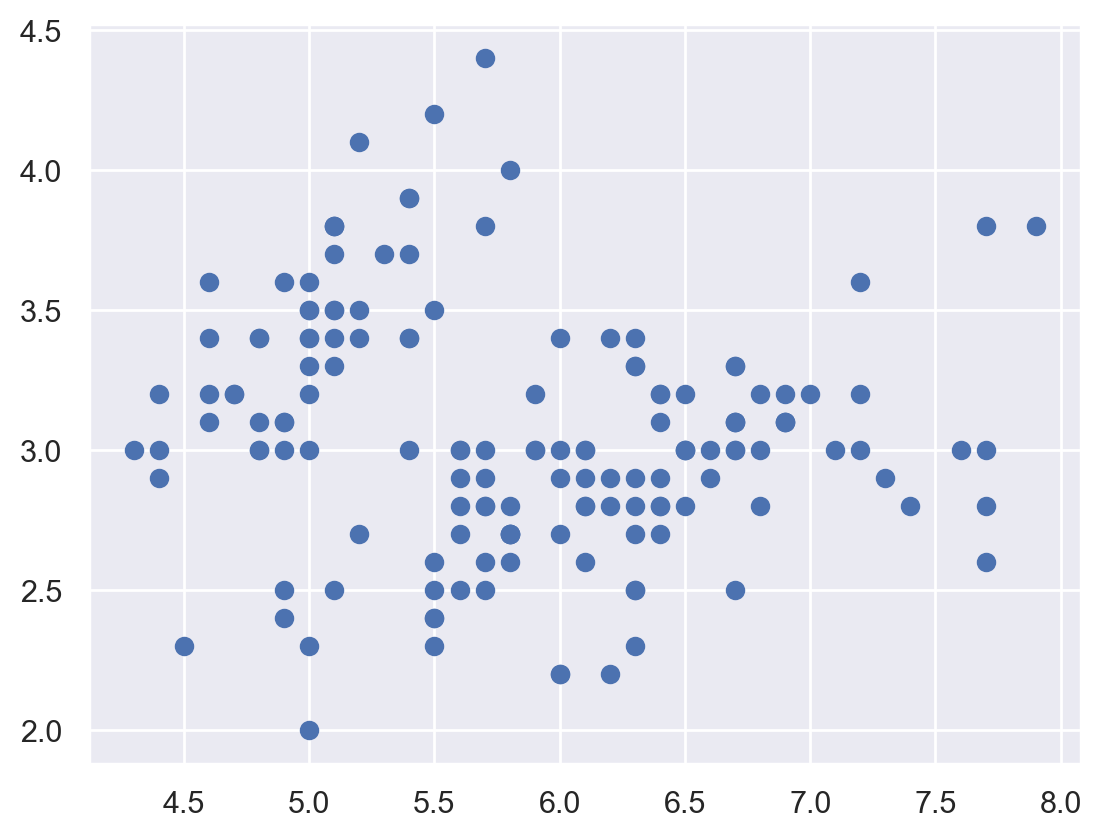

In [8]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.show()

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

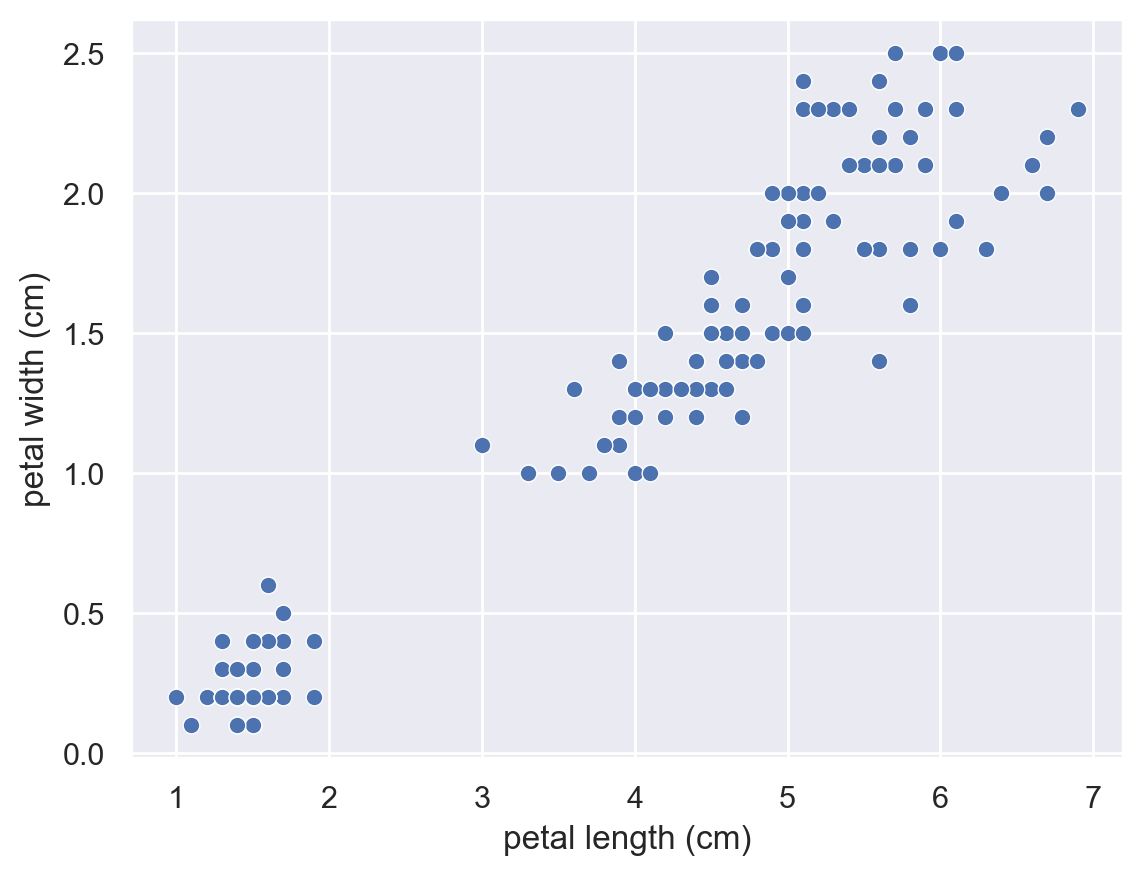

In [9]:
sns.scatterplot(df, x='petal length (cm)', y='petal width (cm)')

## Test ProfileReport

In [10]:
from ydata_profiling import ProfileReport

In [11]:
profile = ProfileReport(
    df, 
    title='Iris Data',
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },
)

In [12]:
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Test Packages for SOM

In [13]:
from IPython.display import YouTubeVideo
import minisom

In [14]:
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

In [15]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

sm = sompy.SOMFactory().build(
    df.values, 
    mapsize=[8, 16],  # NEEDS TO BE A LIST
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=dataset.feature_names
)
sm.train(n_job=4, verbose='info', train_rough_len=50, train_finetune_len=50)

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 6.000000 , radius_final: 1.000000, trainlen: 50

 epoch: 1 ---> elapsed time:  0.005000, quantization error: 0.785714

 epoch: 2 ---> elapsed time:  0.005000, quantization error: 1.845588

 epoch: 3 ---> elapsed time:  0.004000, quantization error: 1.774319

 epoch: 4 ---> elapsed time:  0.004000, quantization error: 1.687941

 epoch: 5 ---> elapsed time:  0.003000, quantization error: 1.649278

 epoch: 6 ---> elapsed time:  0.004000, quantization error: 1.641321

 epoch: 7 ---> elapsed time:  0.003000, quantization error: 1.632779

 epoch: 8 ---> elapsed time:  0.003000, quantization error: 1.624337

 epoch: 9 ---> elapsed time:  0.002000, quantization error: 1.615514

 epoch: 10 ---> elapsed time:  0.002000, quantization error: 1.606272

 epoch: 11 ---> elapsed time:  0.002000, quantization error: 1.596510

 epoch: 12 ---> elapsed time:  0.003000, quantization error: 1.586218

 epoch: 13 ---> e

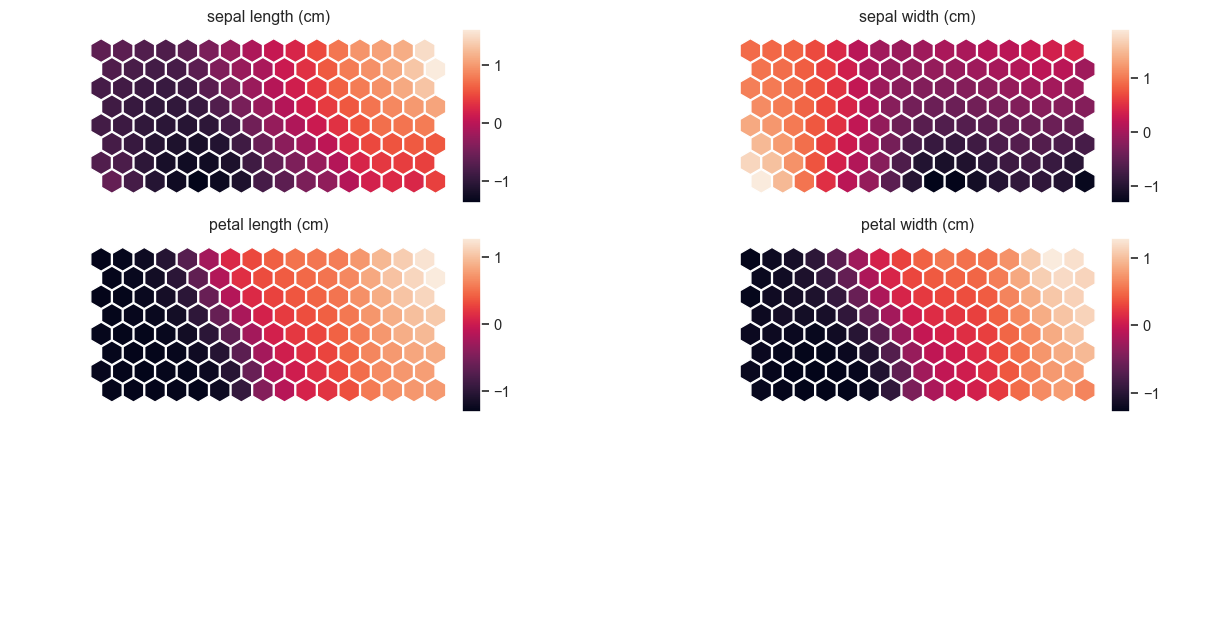

In [16]:
plt.rcParams['figure.dpi'] = 48

sns.set()
view2D = View2D(8, 16, "", text_size=10)
view2D.show(sm, col_sz=2, what='codebook')

plt.show()

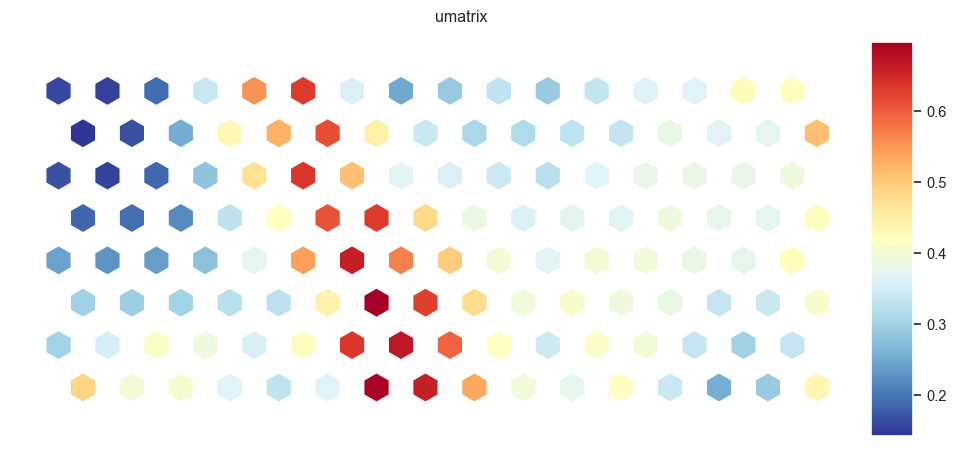

In [17]:
u = sompy.umatrix.UMatrixView(9, 9, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance=3,
)

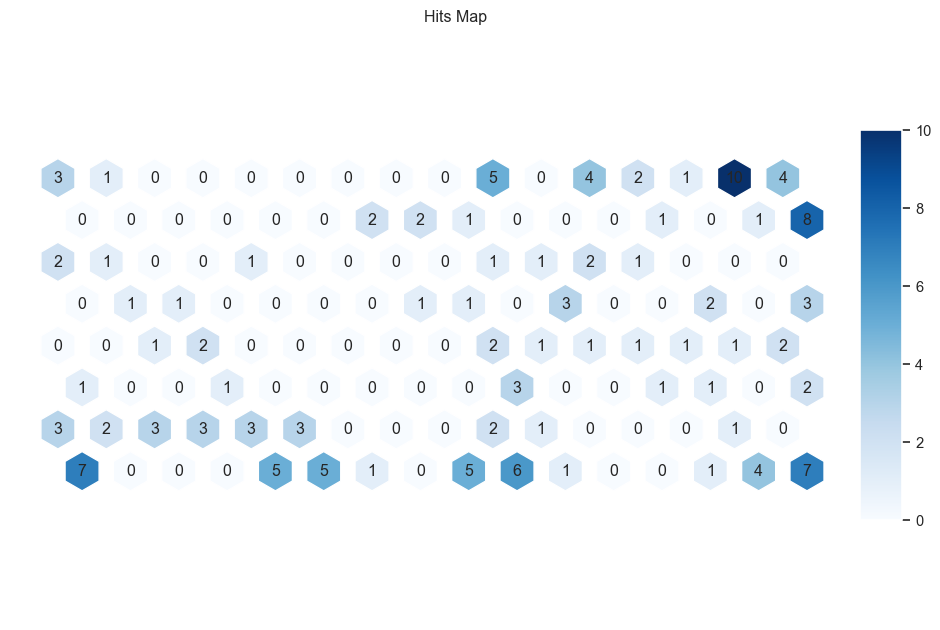

In [18]:
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
plt.show()

## Test Graphviz

In [19]:
import graphviz

In [20]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split


In [21]:
kmclust = KMeans(n_clusters=3, init='random', n_init=10, random_state=1)
km_labels = kmclust.fit_predict(df)

In [22]:
# Preparing the data
X = df
y = km_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

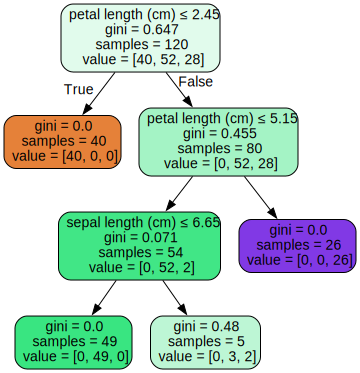

In [23]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)  
graphviz.Source(dot_data)